# Titanic: Machine Learning from Disaster

Competition Description from Kaggle website:
    
"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy."

Thanks to Marco Giuseppe de Pinto who provided a starting point for me to work from. The notebook structure and feature engineering is based on his kernel. 

Note: This notebook is a living document. 

# Import Modules

In [241]:
# Data analysis
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model fitting and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import Data

In [242]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
combined = [train, test]

# EDA

Get basic information about the data. 

The following observations can be made:
- There are 891 observations of 12 features 
- Age and Cabin have missing values
- There are 2 float variables, 5 integer variables and 5 object type variables

In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Take a look at a few observations. 

In [244]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [245]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

View summary statistics of numeric variables. 

In [246]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

The mean of Survived is 0.38 which means that approximately 38% of passengers survived. This can also be observed by checking the value counts of the variable. 

In [247]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Visual EDA

### Bar plots for categorical variables of interest

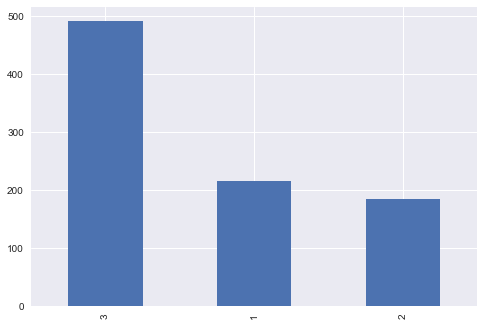

In [248]:
# Passenger Class
train.Pclass.value_counts().plot(kind='bar')
plt.show()

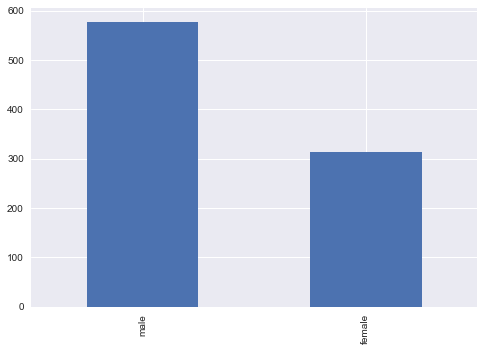

In [249]:
# Gender
train.Sex.value_counts().plot(kind='bar')
plt.show()

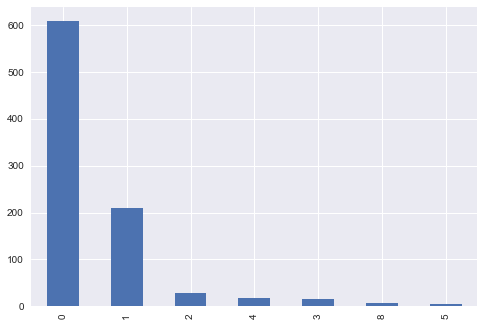

In [250]:
# Number of siblings
train.SibSp.value_counts().plot(kind='bar')
plt.show()

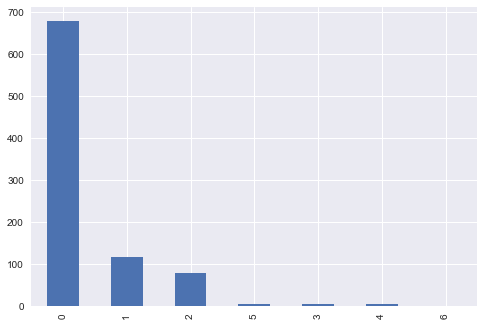

In [251]:
# Number of parents/children aboard
train.Parch.value_counts().plot(kind='bar')
plt.show()

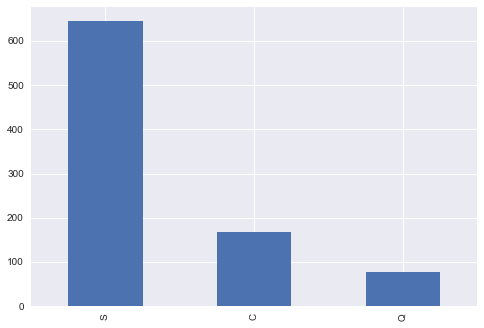

In [252]:
# Port of embarkation
train.Embarked.value_counts().plot(kind='bar')
plt.show()

### Histograms for numerical variables of interest

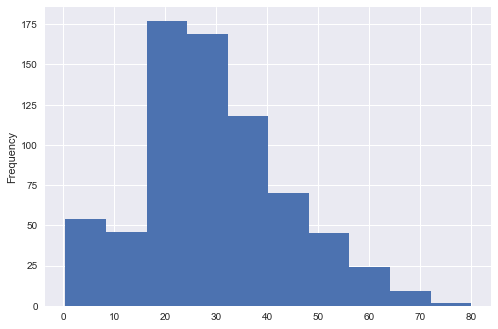

In [253]:
# Passenger Age
train.Age.plot(kind='hist')
plt.show()

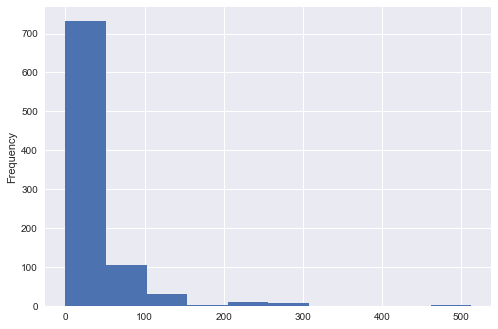

In [254]:
# Fare
train.Fare.plot(kind='hist')
plt.show()

### Correlation analysis

Before doing correlation analysis the categorical variables will be encoded numerically and scaled (this will be needed during the modeling stage in any case). 

In [255]:
# Encode Gender
for data in combined:
    data.Sex.unique()
    data.Sex = data.Sex.astype('category')
    data.Sex = data.Sex.cat.reorder_categories(['male', 'female'])
    data.Sex = data.Sex.cat.codes

In [256]:
# Encode Cabin
test_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']
train_categories = test_categories + ['T']
categories = [train_categories, test_categories]
for index, data in enumerate(combined):
    data.Cabin.unique()
    data.Cabin.value_counts(dropna=False).head()
    data.Cabin.fillna('U', inplace=True) # Replace missing values with 'U' (for Unknown)
    data.Cabin = data.Cabin.apply(lambda x: x[0])
    data.Cabin.unique()
    data.Cabin = data.Cabin.astype('category')
    data.Cabin = data.Cabin.cat.reorder_categories(categories[index])
    data.Cabin = data.Cabin.cat.codes
    data.Cabin = StandardScaler().fit_transform(data.Cabin.values.reshape(-1, 1))

In [257]:
# Encode Embarked
test_categories = ['S', 'C', 'Q']
train_categories = test_categories + ['U']
categories = [train_categories, test_categories]
for index, data in enumerate(combined):
    data.Embarked.unique()
    data.Embarked.fillna('U', inplace=True) # Replace missing values with 'U' (for Unknown)
    data.Embarked.unique()
    data.Embarked = data.Embarked.astype('category')
    data.Embarked = data.Embarked.cat.reorder_categories(categories[index])
    data.Embarked = data.Embarked.cat.codes
    data.Embarked = StandardScaler().fit_transform(data.Embarked.values.reshape(-1, 1))

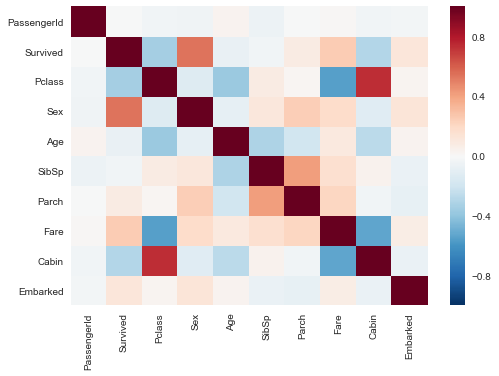

In [258]:
# Create heatmap
sns.heatmap(train.corr())
plt.show()

From the correlation plot we observe that the response variable Survived is positively correlated with Sex (Females more likely to survive) and Fare (higher Fare more likely to survive) and negatively correlated with PClass (1st class more likely to survive) and Cabin.

Other correlations are also intuitive, for example SibSp and Parch are positively correlated which suggests that if someone travelled with their siblings they probably also traveled with their parents. 

# Missing values

Check for missing values:

In [259]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [260]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin          False
Embarked       False
dtype: bool

Perform median imputation:

In [261]:
for data in combined:
    data['Age'] = data['Age'].fillna(data['Age'].median())

test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [262]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [263]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

# Feature Engineering

## New Features

Family size related features:

In [264]:
for data in combined:
    # Size of the family including the passenger
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    
    # Introducing other features based on the family size
    data['Singleton'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

Replacing names with titles (e.g. Mr, Mrs): 

In [265]:
# Titles with very low frequencies to be put in a "Rare title" category
rare_titles = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Mapping from title to number
replacement = {
    'Master': 0,
    'Miss': 1,
    'Mr': 2,
    'Mrs': 3,
    'Rare title': 4
}

# Perform replacement
for data in combined:
    data["Name"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)

    data.replace(rare_titles, "Rare title", inplace=True)

    data.replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

    # Show title counts by sex
    print(data.groupby(["Sex", "Name"]).size().unstack(fill_value=0))

    # Now can numerically encode the titles
    data['Name'] = data['Name'].apply(lambda x: replacement.get(x))
    data['Name'] = StandardScaler().fit_transform(data['Name'].values.reshape(-1, 1))
    print(data.head()['Name'])

Name  Master  Miss   Mr  Mrs  Rare title
Sex                                     
0         40     0  517    0          20
1          0   185    0  126           3
0    0.132454
1    1.401453
2   -1.136545
3    1.401453
4    0.132454
Name: Name, dtype: float64
Name  Master  Miss   Mr  Mrs  Rare title
Sex                                     
0         21     0  240    0           5
1          0    79    0   72           1
0    0.113169
1    1.391672
2    0.113169
3    0.113169
4    1.391672
Name: Name, dtype: float64


# Final Preparation

Separate features and target (and drop irrelevant features e.g. PassengerID):

In [267]:
train_df = train.drop(['Ticket', 'PassengerId'], axis=1)
train_df.shape

(891, 14)

In [268]:
test_df = test.drop(['Ticket'], axis=1)
test_df.shape

(418, 14)

In [269]:
# Training and validation data
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

# Testing data
X_test  = test_df.drop("PassengerId", axis=1).copy()

# Check shapes
X.shape, y.shape, X_test.shape

((891, 13), (891L,), (418, 13))

Quick check:

In [270]:
X.head()

Pclass      Name  Sex   Age  SibSp  Parch     Fare     Cabin  Embarked  \
0       3  0.132454    0  22.0      1      0   7.2500  0.511293 -0.568764   
1       1  1.401453    1  38.0      1      0  71.2833 -1.914491  0.976263   
2       3 -1.136545    1  26.0      0      0   7.9250  0.511293 -0.568764   
3       1  1.401453    1  35.0      1      0  53.1000 -1.914491 -0.568764   
4       3  0.132454    0  35.0      0      0   8.0500  0.511293 -0.568764   

   FamilySize  Singleton  SmallFamily  LargeFamily  
0           2          0            1            0  
1           2          0            1            0  
2           1          1            0            0  
3           2          0            1            0  
4           1          1            0            0

In [271]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [272]:
X_test.head()

Pclass      Name  Sex   Age  SibSp  Parch     Fare     Cabin  Embarked  \
0       3  0.113169    0  34.5      0      0   7.8292  0.500456  2.243165   
1       3  1.391672    1  47.0      1      0   7.0000  0.500456 -0.677841   
2       2  0.113169    0  62.0      0      0   9.6875  0.500456  2.243165   
3       3  0.113169    0  27.0      0      0   8.6625  0.500456 -0.677841   
4       3  1.391672    1  22.0      1      1  12.2875  0.500456 -0.677841   

   FamilySize  Singleton  SmallFamily  LargeFamily  
0           1          1            0            0  
1           2          0            1            0  
2           1          1            0            0  
3           1          1            0            0  
4           3          0            1            0

# Modeling

## Logistic Regression

In [273]:
log_reg = GridSearchCV(estimator = LogisticRegression(random_state=786),
                       param_grid = {'penalty': ['l1', 'l2'], 
                                     'C': np.linspace(0.6,1,10),
                                     'class_weight': [None, 'balanced']},
                       cv = 2,
                       refit = True)
log_reg.fit(X, y)
print(log_reg.best_params_)
Y_pred = log_reg.predict(X_test)
log_reg_acc_train = round(log_reg.score(X, y) * 100, 2)
log_reg_acc_val = round(log_reg.best_score_ * 100, 2)
print("Training accuracy: ", log_reg_acc_train)
print("Validation accuracy: ", log_reg_acc_val)

{'penalty': 'l1', 'C': 0.95555555555555549, 'class_weight': None}
('Training accuracy: ', 81.71)
('Validation accuracy: ', 80.13)


## Random Forest

In [274]:
random_forest = GridSearchCV(estimator = RandomForestClassifier(random_state=786),
                       param_grid = {'n_estimators': [100], 
                                     'max_features': np.linspace(0.3, 1, 10),
                                     'min_samples_leaf': list(range(1, 17, 3)), 
                                     'class_weight': [None, 'balanced']},
                       cv = 2,
                       refit = True)
random_forest.fit(X, y)
print(random_forest.best_params_)
Y_pred = random_forest.predict(X_test)
random_forest_acc_train = round(random_forest.score(X, y) * 100, 2)
random_forest_acc_val = round(random_forest.best_score_ * 100, 2)
print("Training accuracy: ", random_forest_acc_train)
print("Validation accuracy: ", random_forest_acc_val)

{'max_features': 0.92222222222222228, 'n_estimators': 100, 'min_samples_leaf': 7, 'class_weight': None}
('Training accuracy: ', 87.77)
('Validation accuracy: ', 81.82)


## Random forest after feature selection

In [275]:
relative_importances = pd.DataFrame(index=X.columns, 
                                    data=random_forest.best_estimator_.feature_importances_,
                                    columns=["importance"])

# Sort values to learn most important features
print(relative_importances.sort_values(by="importance", ascending=False))

# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = X[selected_list]
features_test_selected = X_test[selected_list]

random_forest_sel = GridSearchCV(estimator = RandomForestClassifier(random_state=786),
                       param_grid = {'n_estimators': [100, 200], 
                                     'max_features': np.linspace(0.3, 1, 8),
                                     'min_samples_leaf': list(range(1, 15, 2)), 
                                     'class_weight': [None, 'balanced']},
                       cv = 2,
                       refit = True)
random_forest_sel.fit(features_train_selected, y)
print(random_forest_sel.best_params_)
Y_pred = random_forest_sel.predict(features_test_selected)
random_forest_sel_acc_train = round(random_forest_sel.score(features_train_selected, y) * 100, 2)
random_forest_sel_acc_val = round(random_forest_sel.best_score_ * 100, 2)
print("Training accuracy: ", random_forest_sel_acc_train)
print("Validation accuracy: ", random_forest_sel_acc_val)

             importance
Sex            0.434777
Fare           0.128273
Pclass         0.117515
Age            0.103663
Name           0.057465
Cabin          0.055936
FamilySize     0.024261
Embarked       0.022090
SibSp          0.019131
LargeFamily    0.016649
SmallFamily    0.012253
Parch          0.005828
Singleton      0.002157
{'max_features': 0.5, 'n_estimators': 100, 'min_samples_leaf': 3, 'class_weight': 'balanced'}
('Training accuracy: ', 90.68)
('Validation accuracy: ', 81.82)


# Model Ranking

In [276]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Random Forest after Feature Selection'],
    'Training_Score': [log_reg_acc_train, random_forest_acc_train, random_forest_sel_acc_train], 
    'Validation_Score': [log_reg_acc_val, random_forest_acc_val, random_forest_sel_acc_val]})
models.sort_values(by='Validation_Score', ascending=False)

Model  Training_Score  Validation_Score
1                          Random Forest           87.77             81.82
2  Random Forest after Feature Selection           90.68             81.82
0                    Logistic Regression           81.71             80.13

# Prepare Submission File

In [277]:
subm = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
subm.to_csv('subm.csv', index=False)